<a href="https://colab.research.google.com/github/selvamani1992/Loan_Approval_Prediction/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Prediction

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, r2_score, roc_auc_score, f1_score

## Data Cleaning

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/Loan_prediction.csv')

In [4]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
dataset.drop('Loan_ID', axis=1, inplace = True)

In [7]:
dataset.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
dataset.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
dataset.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
dataset.Gender.fillna((dataset.Gender.mode()[0]),inplace=True)

In [11]:
dataset.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [12]:
dataset.Married.fillna((dataset.Married.mode()[0]),inplace=True)

In [13]:
dataset.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [14]:
dataset.Dependents[0]

'0'

In [15]:
dataset.Dependents.fillna((dataset.Dependents.mode()[0]),inplace=True)
dataset.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [16]:
dataset.Dependents = dataset.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [17]:
dataset.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [18]:
dataset.Self_Employed.fillna((dataset.Self_Employed.mode()[0]),inplace=True)
dataset.Self_Employed.value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [19]:
dataset.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.744300,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.009623,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,1.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [20]:
dataset.LoanAmount.median()

128.0

In [21]:
dataset.LoanAmount.fillna((dataset.LoanAmount.median()),inplace=True)
dataset.LoanAmount.isnull().sum()

0

In [22]:
dataset.Loan_Amount_Term.fillna((dataset.Loan_Amount_Term.median()),inplace=True)
dataset.Loan_Amount_Term.isnull().sum()

0

In [23]:
dataset.Credit_History.median()

1.0

In [24]:
dataset.Credit_History.fillna((dataset.Credit_History.mode()[0]),inplace=True)
dataset.Credit_History.value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [25]:
dataset.Credit_History.isnull().sum()

0

In [26]:
dataset.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## EDA

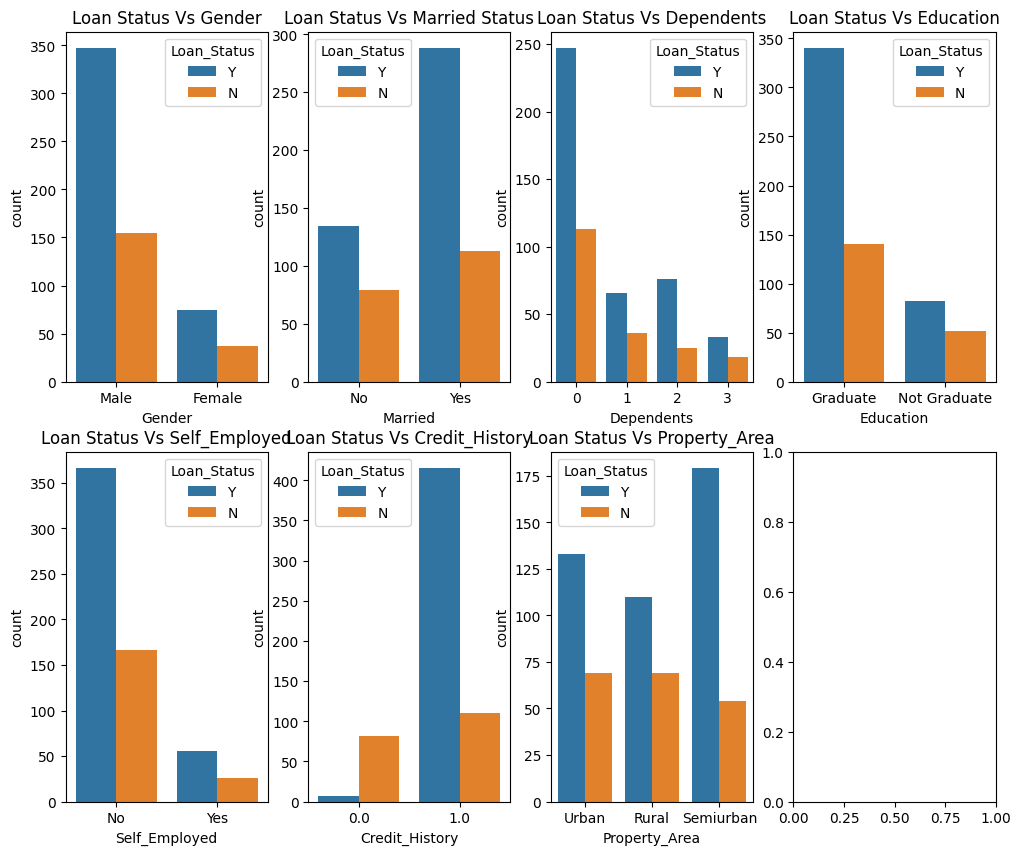

In [27]:
fig, axs = plt.subplots(2, 4, figsize=(12,10))
sns.countplot(dataset,x='Gender',hue='Loan_Status', ax=axs[0,0])
axs[0,0].set_title('Loan Status Vs Gender')

sns.countplot(dataset,x='Married',hue='Loan_Status', ax=axs[0,1])
axs[0,1].set_title('Loan Status Vs Married Status')

sns.countplot(dataset,x='Dependents',hue='Loan_Status', ax=axs[0,2])
axs[0,2].set_title('Loan Status Vs Dependents')

sns.countplot(dataset,x='Education',hue='Loan_Status', ax=axs[0,3])
axs[0,3].set_title('Loan Status Vs Education')

sns.countplot(dataset,x='Self_Employed',hue='Loan_Status', ax=axs[1,0])
axs[1,0].set_title('Loan Status Vs Self_Employed')

sns.countplot(dataset,x='Credit_History',hue='Loan_Status', ax=axs[1,1])
axs[1,1].set_title('Loan Status Vs Credit_History')

sns.countplot(dataset,x='Property_Area',hue='Loan_Status', ax=axs[1,2])
axs[1,2].set_title('Loan Status Vs Property_Area')


plt.show()

In [28]:
dataset.groupby('Gender')['Loan_Status'].value_counts()

Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              347
        N              155
Name: Loan_Status, dtype: int64

**Gender**

In [29]:
(dataset.Gender[(dataset.Loan_Status == 'Y')].value_counts()/dataset.Gender.value_counts())*100

Male      69.123506
Female    66.964286
Name: Gender, dtype: float64

In [30]:
dataset.groupby('Married')['Loan_Status'].value_counts()

Married  Loan_Status
No       Y              134
         N               79
Yes      Y              288
         N              113
Name: Loan_Status, dtype: int64

**Married**

In [31]:
dataset.Married.value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [32]:
(dataset.Married[(dataset.Loan_Status == 'Y')].value_counts()/dataset.Married.value_counts())*100

Yes    71.820449
No     62.910798
Name: Married, dtype: float64

**Dependents**

In [33]:
dataset.Dependents.value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [34]:
(dataset.Dependents[(dataset.Loan_Status == 'Y')].value_counts()/dataset.Dependents.value_counts())*100

0    68.611111
1    64.705882
2    75.247525
3    64.705882
Name: Dependents, dtype: float64

In [35]:
(dataset.Dependents.value_counts()/dataset.shape[0])*100

0    58.631922
1    16.612378
2    16.449511
3     8.306189
Name: Dependents, dtype: float64

**Education**

In [36]:
(dataset.Education[(dataset.Loan_Status == 'Y')].value_counts()/dataset.Education.value_counts())*100

Graduate        70.833333
Not Graduate    61.194030
Name: Education, dtype: float64

In [37]:
(dataset.Education.value_counts()/dataset.shape[0])*100

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64

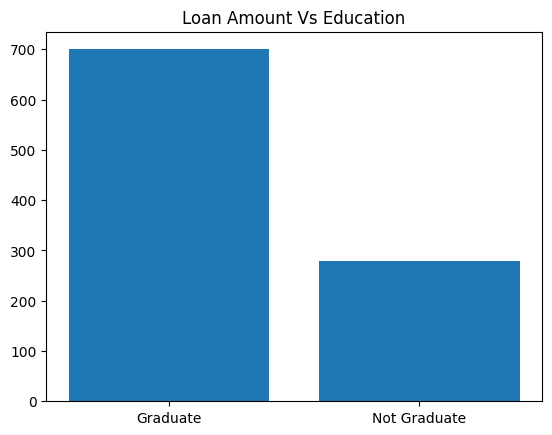

In [38]:
plt.bar(data=dataset,height='LoanAmount',x='Education')
plt.title('Loan Amount Vs Education')
plt.show()

**Self_Employed**

In [39]:
(dataset.Self_Employed[(dataset.Loan_Status == 'Y')].value_counts()/dataset.Self_Employed.value_counts())*100

No     68.796992
Yes    68.292683
Name: Self_Employed, dtype: float64

In [40]:
(dataset.Self_Employed.value_counts()/dataset.shape[0])*100

No     86.644951
Yes    13.355049
Name: Self_Employed, dtype: float64

**Credit History**

In [41]:
(dataset.Credit_History[(dataset.Loan_Status == 'Y')].value_counts()/dataset.Credit_History.value_counts())*100

1.0    79.047619
0.0     7.865169
Name: Credit_History, dtype: float64

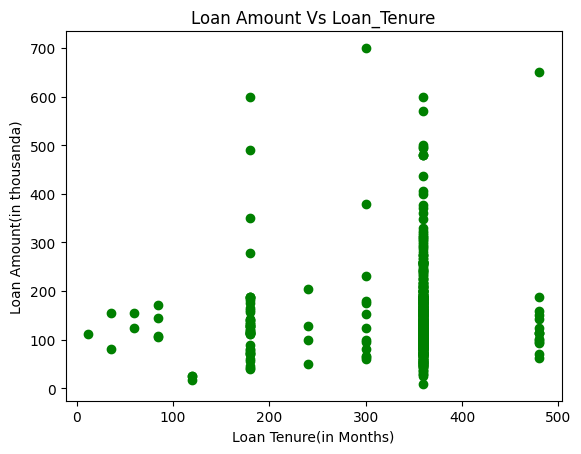

In [42]:
plt.scatter(x=dataset.Loan_Amount_Term,y=dataset.LoanAmount,c='green')
plt.title('Loan Amount Vs Loan_Tenure')
plt.xlabel('Loan Tenure(in Months)')
plt.ylabel('Loan Amount(in thousanda)')
plt.show()

Findings

> **Gender:** Although the application rate of males is higher than females, the loan approval rate is almost equal.


> **Married:** Married individuals apply for loans at double the rate of unmarried individuals, and they have almost a 10% higher chance of loan approval.

> **Dependents:** There isn't much difference in approval rates based on whether an applicant has dependents, but 58% of loan applications come from individuals who have no dependents.

> **Education:** 78% of application for loan are from Graduate and they are have 10% higher chances of getting approval compared to non-graduates

> **Employement Type:** The percentage of applications from self-employed individuals is only 13%, compared to other types of employment. However, the approval rate is equal for all types of employment.

> **Credit_History:** First-time loan applicants have a lower chance of getting approval, while individuals with prior loan history have an 80% chance of getting their loan approved.



## Data Encoding

In [43]:
dataset.dtypes

Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [44]:
dataset.Self_Employed.unique()

array(['No', 'Yes'], dtype=object)

In [45]:
dataset.Gender = dataset.Gender.map({'Male':0,'Female':1})
dataset.Married = dataset.Married.map({'No':0,'Yes':1})
dataset.Education = dataset.Education.map({'Not Graduate':0,'Graduate':1})
dataset.Self_Employed = dataset.Self_Employed.map({'No':1,'Yes':0})
dataset.Loan_Status = dataset.Loan_Status.map({'N':0,'Y':1})
dataset.Credit_History = dataset.Credit_History.astype('int')
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,1,5849,0.0,128.0,360.0,1,Urban,1
1,0,1,1,1,1,4583,1508.0,128.0,360.0,1,Rural,0
2,0,1,0,1,0,3000,0.0,66.0,360.0,1,Urban,1
3,0,1,0,0,1,2583,2358.0,120.0,360.0,1,Urban,1
4,0,0,0,1,1,6000,0.0,141.0,360.0,1,Urban,1


In [46]:
dataset_one_hot = pd.get_dummies(dataset,columns=['Property_Area'])

In [47]:
dataset_one_hot.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,0,1,1,5849,0.0,128.0,360.0,1,1,0,0,1
1,0,1,1,1,1,4583,1508.0,128.0,360.0,1,0,1,0,0
2,0,1,0,1,0,3000,0.0,66.0,360.0,1,1,0,0,1
3,0,1,0,0,1,2583,2358.0,120.0,360.0,1,1,0,0,1
4,0,0,0,1,1,6000,0.0,141.0,360.0,1,1,0,0,1


In [48]:
X = dataset_one_hot.drop(['Loan_Status'],axis=1)
y = dataset_one_hot.Loan_Status

## Spliting

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=55)

In [50]:
X_train.shape,X_test.shape

((491, 13), (123, 13))

In [51]:
y_train.shape,y_test.shape

((491,), (123,))

## Scaling

In [52]:
scaler = StandardScaler()

In [53]:
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

## Metric Scoring

In [54]:
scoring = {
    'AU_ROC': make_scorer(roc_auc_score),
    'f1_score': make_scorer(f1_score)
}

In [55]:
scores_list = []

## Logistic Regression

In [56]:
LogReg = LogisticRegression()

In [57]:
from sklearn.model_selection import cross_validate

In [58]:
Log_scores = cross_validate(LogReg, X_train_scale, y_train, cv=10, scoring=scoring)

In [59]:
Log_scores

{'fit_time': array([0.02168798, 0.01384044, 0.00807333, 0.01314354, 0.00761604,
        0.00444102, 0.02751255, 0.01774788, 0.01296568, 0.04157448]),
 'score_time': array([0.01659274, 0.0261631 , 0.02793074, 0.00832462, 0.01595449,
        0.01000094, 0.00448155, 0.02183127, 0.00423646, 0.01479983]),
 'test_AU_ROC': array([0.75238095, 0.84285714, 0.72142857, 0.84285714, 0.71428571,
        0.73333333, 0.66666667, 0.7       , 0.57058824, 0.7       ]),
 'test_f1_score': array([0.89473684, 0.93150685, 0.88      , 0.93150685, 0.8974359 ,
        0.89473684, 0.87179487, 0.88311688, 0.82051282, 0.88311688])}

In [60]:
Log_scores['test_f1_score'].mean(),Log_scores['test_AU_ROC'].mean()

(0.888846473881802, 0.7244397759103642)

In [61]:
a = ('Logistic Regression',Log_scores['test_f1_score'].mean(),Log_scores['test_AU_ROC'].mean())

In [62]:
scores_list.append(a)

## KNN Model

In [63]:
best_k = best_score = 0
for k in [1,2,3,4,5,6,7,8,9,10,20,30]:
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn,X_train_scale, y_train, cv = 10, scoring = 'accuracy').mean()
  print("K value : ", k, "test score : ", score)
  if best_score < score:
    best_score = score
    best_k = k
print(f'\n\n\n best_k : {best_k} with the score of {best_score}')

K value :  1 test score :  0.7433877551020408
K value :  2 test score :  0.6904897959183673
K value :  3 test score :  0.8004081632653062
K value :  4 test score :  0.7820816326530612
K value :  5 test score :  0.8145714285714286
K value :  6 test score :  0.7921632653061226
K value :  7 test score :  0.8044081632653061
K value :  8 test score :  0.7962857142857142
K value :  9 test score :  0.8166530612244898
K value :  10 test score :  0.810530612244898
K value :  20 test score :  0.7942857142857143
K value :  30 test score :  0.7698367346938776



 best_k : 9 with the score of 0.8166530612244898


In [64]:
knn = KNeighborsClassifier(n_neighbors=best_k)
Knn_scores = cross_validate(knn, X_train_scale, y_train, cv=10, scoring=scoring)

In [65]:
Knn_scores['test_f1_score'].mean(),Knn_scores['test_AU_ROC'].mean()

(0.8831933271406955, 0.7074929971988795)

In [66]:
a = ('KNN',Knn_scores['test_f1_score'].mean(),Knn_scores['test_AU_ROC'].mean())
scores_list.append(a)

## Label encoding for Decision Tree and Random Forest

In [67]:
dataset.Property_Area = dataset.Property_Area.map({'Urban':0,'Rural':1,'Semiurban':2})
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,1,5849,0.0,128.0,360.0,1,0,1
1,0,1,1,1,1,4583,1508.0,128.0,360.0,1,1,0
2,0,1,0,1,0,3000,0.0,66.0,360.0,1,0,1
3,0,1,0,0,1,2583,2358.0,120.0,360.0,1,0,1
4,0,0,0,1,1,6000,0.0,141.0,360.0,1,0,1


In [68]:
X = dataset.drop(['Loan_Status'],axis=1)
y = dataset.Loan_Status
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=55)
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

## Decision Tree

In [69]:
best_depth = best_score = 0
for depth in [1,2,3,4,5,6,7,8,9,10,20,30]:
  dt = DecisionTreeClassifier(max_depth=depth)
  score = np.mean(cross_val_score(dt,X_train_scale, y_train, cv = 10, scoring = 'accuracy'))
  print("Depth Level : ", depth, "test score : ", score)
  if best_score < score:
    best_score = score
    best_depth = depth
print(f'\n\n\n best Depth : {best_depth} with the score of {best_score}')

Depth Level :  1 test score :  0.8288571428571428
Depth Level :  2 test score :  0.8268571428571428
Depth Level :  3 test score :  0.8207755102040817
Depth Level :  4 test score :  0.824857142857143
Depth Level :  5 test score :  0.8166938775510205
Depth Level :  6 test score :  0.8125714285714285
Depth Level :  7 test score :  0.7922857142857144
Depth Level :  8 test score :  0.7921632653061224
Depth Level :  9 test score :  0.7821224489795918
Depth Level :  10 test score :  0.7616734693877552
Depth Level :  20 test score :  0.7353061224489796
Depth Level :  30 test score :  0.7292244897959185



 best Depth : 1 with the score of 0.8288571428571428


In [70]:
dt = DecisionTreeClassifier(max_depth=best_depth)
dt_score = cross_validate(dt, X_train_scale, y_train, cv=10, scoring=scoring)

In [71]:
dt_score['test_f1_score'].mean(),dt_score['test_AU_ROC'].mean()

(0.8902561869757257, 0.7256302521008403)

In [72]:
a = ('Decision Tree',dt_score['test_f1_score'].mean(),dt_score['test_AU_ROC'].mean())
scores_list.append(a)

## Random Forest

In [73]:
X.shape

(614, 11)

In [74]:
rf = RandomForestClassifier(n_estimators= 100, max_depth = 3, max_features='sqrt')
rf_score = cross_validate(rf, X_train_scale, y_train, cv=10, scoring=scoring)

In [75]:
rf_score

{'fit_time': array([0.26794744, 0.36382532, 0.37559938, 0.30003977, 0.30697894,
        0.25502348, 0.4478693 , 0.60793281, 0.80562758, 0.6664257 ]),
 'score_time': array([0.02163529, 0.0223    , 0.02750826, 0.02246618, 0.02163148,
        0.02158618, 0.03360701, 0.03534126, 0.06351566, 0.06420016]),
 'test_AU_ROC': array([0.75238095, 0.84285714, 0.68571429, 0.82857143, 0.71428571,
        0.73333333, 0.7       , 0.7       , 0.57058824, 0.7       ]),
 'test_f1_score': array([0.89473684, 0.93150685, 0.86842105, 0.91666667, 0.8974359 ,
        0.89473684, 0.88311688, 0.88311688, 0.82051282, 0.88311688])}

In [76]:
a = ('Random Forest Classifier',rf_score['test_f1_score'].mean(),rf_score['test_AU_ROC'].mean())
scores_list.append(a)

## Score Analysis

In [77]:
metric_df = pd.DataFrame(scores_list,columns=['Algo','F1','Au_ROC'])
metric_df.set_index('Algo', inplace= True)
metric_df

,F1,Au_ROC
Algo,,
Logistic Regression,0.888846,0.724440
KNN,0.883193,0.707493
Decision Tree,0.890256,0.725630
Random Forest Classifier,0.887337,0.722773


All the above scores are predicted using x-train,y-train cross_validation and based on that Decision Tree and Random Forest Classifier giving best results. will use the same to evaluate X_test and Y_test.

In [80]:
dt = DecisionTreeClassifier(max_depth=best_depth)
dt.fit(X_train_scale, y_train)
y_predict = dt.predict(X_test_scale)

In [82]:
roc_score = roc_auc_score(y_test,y_predict)
f1_score = f1_score(y_test,y_predict)
f1_score, roc_score

(0.8216216216216217, 0.6456804065499717)

## Feature Importance

In [94]:
feature_im = rf.feature_importances_
feature_im

array([0.00441628, 0.05089136, 0.01429817, 0.02933542, 0.00411087,
       0.09079541, 0.09540151, 0.06646499, 0.06550115, 0.52652734,
       0.05225749])

In [95]:
import_feature =  pd.Series(feature_im, index=X.columns).abs().sort_values(ascending=False)

In [96]:
import_feature

Credit_History       0.526527
CoapplicantIncome    0.095402
ApplicantIncome      0.090795
LoanAmount           0.066465
Loan_Amount_Term     0.065501
Property_Area        0.052257
Married              0.050891
Education            0.029335
Dependents           0.014298
Gender               0.004416
Self_Employed        0.004111
dtype: float64

## **Conclusion:**


*   Out of all the algo, Random_Forest and Decision Tree performed well for this dataset
*   **Credit History:** feature play a major role for loan approval.
*   Other Important Feature:
> CoapplicantIncome & ApplicantIncome are other two important feature in top 3 list